<a href="https://colab.research.google.com/github/ksydata/Algorithm_DataStructure/blob/main/Tree_to_heap_SY_231124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from abc import ABC, abstractmethod
import sys
from typing import *

### 1.트리 순회

* 트리
  
  노드(Node, 원)과 엣지(Edge, 선)로 구성되어 순환구조(cycle)을 이루지 않도록 구성한 구조로 사이클이 없어 아래로만 뻗어나가고 계층적으로 표현되는 나무의 구조

* 트리 순회
  
  자료구조에 저장된 모든 데이터를 도는 순회를 위해서는 어떤 순서로 데이터를 출력할 수 있는지 알아야 한다. (재귀의 문제)

  재귀 함수를 호출하는 대신 방문할 노드를 스택에 저장하고, 스택이 빌 때까지 반복문으로 순회하는 방식으로 구현할 수 있다.

  (1) 재귀적으로 왼쪽 서브 트리를 순회 (2) 재귀적으로 오른쪽 서브 트리를 순회 (3) 현재 노드 데이터를 출력

  데이터 간 계층적 관계를 나타내는 트리도 순회를 하면 노드들 사이에 앞과 뒤라는 선형적 순서를 만들 수 있다.

* pre-order 순회 (3) - (1) - (2)

* post-order 순회 (1) - (2) - (3)

* in-order 순회 (1) - (3) - (2) 왼쪽 자식 노드에 더 이상 반환할 값이 없으면

* in-order 순회 구현하기

In [ ]:
class Node:
  """이진 트리 노드를 나타내는 클래스"""
  def __init__(self, data: any):
    """데이터와 왼쪽, 오른쪽 자식 노드에 대한 레퍼런스를 가지는 이진 트리 노드"""
    self.data = data
    self.left_childnode = None
    self.right_childnode = None

def inorder_traversal(node):
  """연결 리스트로 구현 | 계속 왼쪽으로 순회하면 리프노드가 나오고, 자식 노드가 None이 되어 순회를 완료"""
  if node is None:
    inorder_traversal(node.left_childnode)
    # 재귀적으로 왼쪽 서브 트리 순회
    print(node.data)
    # 현재 노드 데이터를 출력
    inorder_traversal(node.right_childnode)
    # 재귀적으로 오른쪽 서브 트리 순회

In [ ]:
# 노드 인스턴스 생성
node_A = Node("A")
node_B = Node("B")
node_C = Node("C")
node_D = Node("D")
node_E = Node("E")
node_F = Node("F")
node_G = Node("G")
node_H = Node("H")
node_I = Node("I")

In [ ]:
# 생성한 노드 인스턴스를 연결
node_F.left_childnode = node_B
node_F.right_childnode = node_G

# F-B-A, F-B-D
node_B.left_childnode = node_A
node_B.right_childnode = node_D

# F-B-D-C, F-B-D-E
node_D.left_childnode = node_C
node_D.right_childnode = node_E

node_F.left_childnode = node_B
node_F.right_childnode = node_G

# F-G-I-H
node_G.left_childnode = node_I
node_I.left_childnode = node_H

In [ ]:
# F 노드를 루트 노드로 만든다
root_node = node_F

In [ ]:
# 만들어 놓은 트리를 in-order 방식으로 순회한다.
inorder_traversal(node = root_node)

* [코딩테스트] 백준 트리의 순회 1991번(2263번 꼭 풀어볼 것)

    ```
    문제
    이진 트리를 입력받아 전위 순회(preorder traversal), 중위 순회(inorder traversal), 후위 순회(postorder traversal)한
    결과를 출력하는 프로그램을 작성하시오.

    입력
    예를 들어 위와 같은 이진 트리가 입력되면,
    전위 순회한 결과 : ABDCEFG // (루트) (왼쪽 자식) (오른쪽 자식)
    중위 순회한 결과 : DBAECFG // (왼쪽 자식) (루트) (오른쪽 자식)
    후위 순회한 결과 : DBEGFCA // (왼쪽 자식) (오른쪽 자식) (루트)

    첫째 줄에는 이진 트리의 노드의 개수 N(1 ≤ N ≤ 26)이 주어진다.
    둘째 줄부터 N개의 줄에 걸쳐 각 노드와 그의 왼쪽 자식 노드, 오른쪽 자식 노드가 주어진다.
    노드의 이름은 A부터 차례대로 알파벳 대문자로 매겨지며, 항상 A가 루트 노드가 된다.
    자식 노드가 없는 경우에는 .으로 표현한다.

    출력
    첫째 줄에 전위 순회, 둘째 줄에 중위 순회, 셋째 줄에 후위 순회한 결과를 출력한다.
    각 줄에 N개의 알파벳을 공백 없이 출력하면 된다.
    ```


In [ ]:
# int를 사용하여 입력 값을 정수로 변환
n = int(input("트리의 사이즈(총 노드의 수)를 입력: "))
  # TypeError: 'str' object cannot be interpreted as an integer

트리의 사이즈(총 노드의 수)를 입력: 100


In [ ]:
input = sys.stdin.readline
sys.setrecursionlimit(10**8)

# 딕셔너리로 트리 구현
tree = {}
for i in range(n):
    root, left, right = map(str, input().split())
      # ValueError: not enough values to unpack (expected 3, got 1)
    tree[root] = left, right
      # {"Root": ("Left Child Node", "Right Child Node")}
      # tree.key = "Root", tree.values = (("Left Child Node", "Right Child Node")}

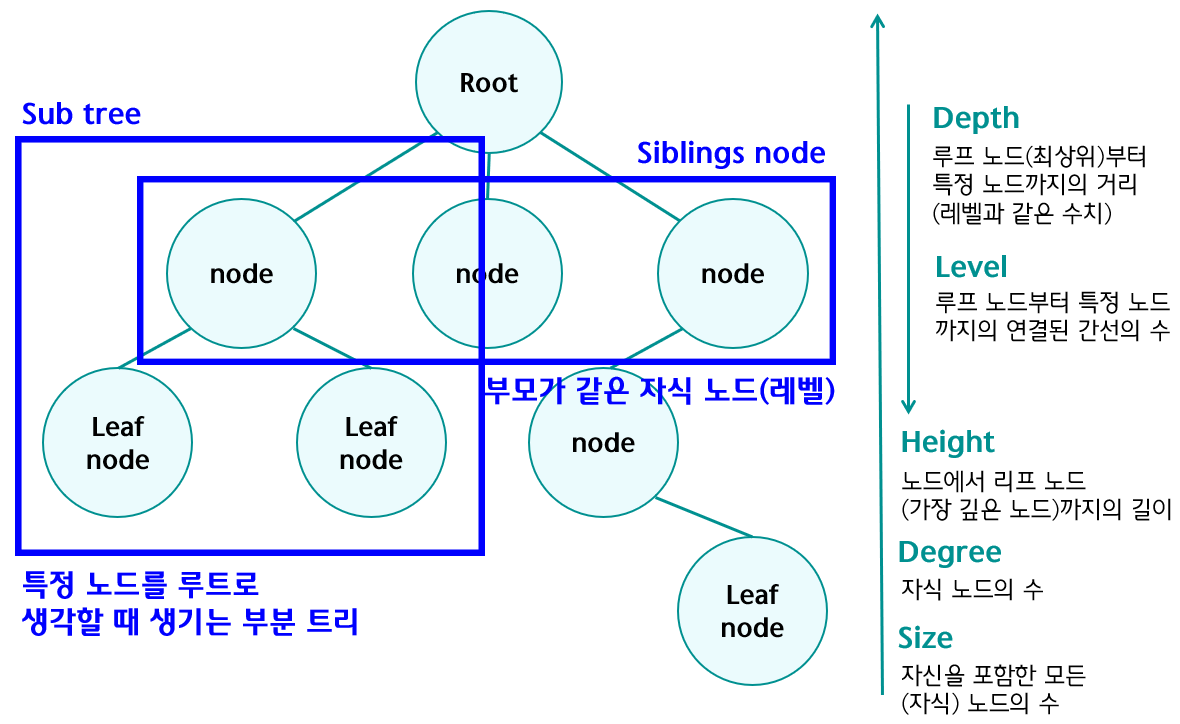

In [ ]:
class Node:
  """이진 트리 노드 클래스"""
  def __init__(self, data):
    """레퍼런스"""
    self.data = data
    self.left_childnode = None
    self.right_childnode = None

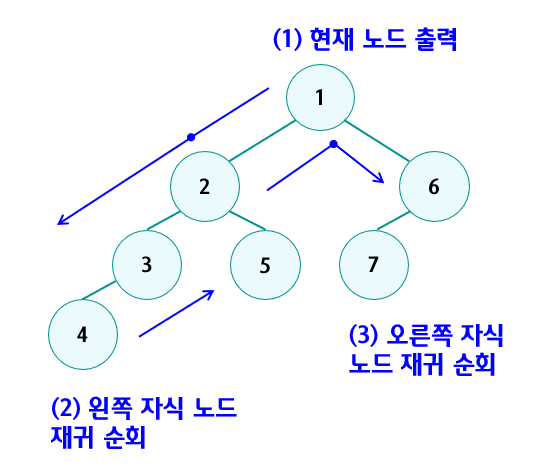

In [ ]:
def traversal_preorder(node: Node):
  """트리 전위 순회(루트 - 왼 - 오) 메서드
  if node.data is not None:
    print(node.data, end = "")
  if node.left_childnode is not None:
    traversal_preorder( tree[node.left_childnode] )
  if node.left_childnode is not None:
    traversal_preorder( tree[node.right_childnode] )
  """
  if node.data != ".":
  # 루트 노트가 .이 아니면 (자식이 있다면)
    print(node.data, end="")
    traversal_preorder(tree[node.data][0])
    traversal_preorder(tree[node.data][1])

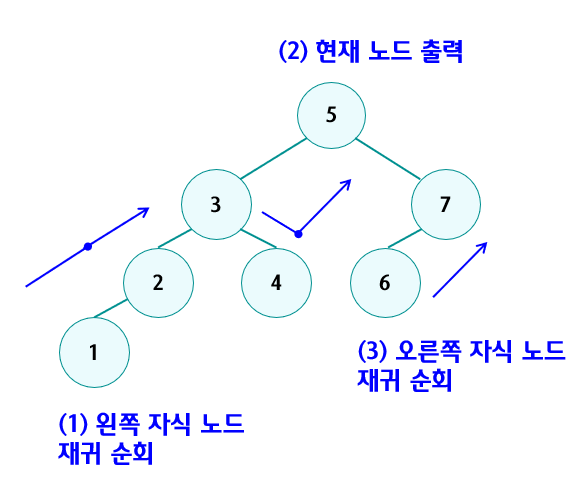

In [ ]:
def traversal_inorder(node: Node):
  """트리 중위 순회(왼 - 루트 - 오) 메서드
  부모 노드를 기준으로 왼쪽과 오른쪽 서브 트리가 나뉜다
  if node.left_childnode is not None:
  # if node.left != '.':
    traversal_inorder( tree[node.left_childnode] )
  print(node.data, end = "")
  if node.right_childnode is not None:
    traversal_inorder( tree[node.right_childnode] )
  """
  if node.data != ".":
    traversal_preorder(tree[node.data][0])
    print(node.data, end="")
    traversal_preorder(tree[node.data][1])

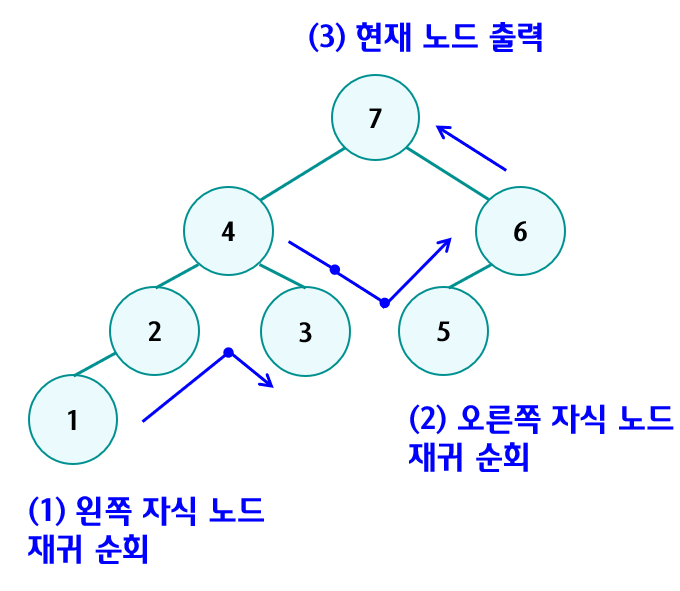

In [ ]:
def traversal_postorder(node: any):
  """트리 후위 순회(왼 - 오 - 루트) 메서드
  if node.left_childnode is not None:
    traversal_postorder( tree[node.left_childnode] )
  if node.right_childnode is not None:
    traversal_postorder( tree[node.right_childnode] )
  print(node.data, end = "")
  """
  if node.data != ".":
    traversal_preorder(tree[node.data][0])
    traversal_preorder(tree[node.data][1])
    print(node.data, end="")

---

### 2.큐

* 배열, 링 버퍼를 통해 구현하는 큐
* 의사코드
```
클래스 큐:

    # append, push
    함수 노드를 삽입할 때:
      만약 빈 큐이면:
        front(가장 먼저 들어온 데이터를 받는 쪽)과 rear(가장 먼저 들어온 데이터를 꺼내는 쪽)가 모두 첫 노드를 가리키도록 한다.
      그렇지 않다면(빈 큐가 아니라면):
        rear의 next(후속 노드의 레퍼런스)가 새 노드를 가리키도록 한다.
        rear를 새 노드로 옮긴다.
        
    # pop, popleft
    함수 노드를 꺼낼 때:
      만약 빈 큐가 되면:
        front와 rear는 모두 None을 가리킨다.
      그렇지 않다면(큐에 노드가 남아있다면):
        front를 front의 next로 옮긴다.
```

* 요세푸스 순열 문제

    ```
    1번부터 N 번까지 N명의 사람이 원을 이루면서 앉아있고, 양의 정수 K(≤ N)가 주어진다.
    이제 순서대로 K 번째 사람을 제거한다. 한 사람이 제거되면 남은 사람들로 이루어진 원을 따라 이 과정을 계속해 나간다.
    이 과정은 N명의 사람이 모두 제거될 때까지 계속된다. 원에서 사람들이 제거되는 순서를 (N, K)-요세푸스 순열이라고 한다.
    예를 들어 (7, 3)-요세푸스 순열은 <3, 6, 2, 7, 5, 1, 4>이다.

    N과 K가 주어지면 (N, K)-요세푸스 순열을 구하는 프로그램을 작성하시오.
    남은 사람들이 원을 이루며 앉아 있고, 앞에서 K 번 뒤로 이동한 후 사람을 제거한다.
    다시 그 자리부터 뒤로 K 번 이동한 후 사람을 제거한다.
    따라서 배열(리스트)의 인덱스를 조작하여 문제를 해결할 수 있다.

    예시
    입력: 7, 3
    출력: [3, 6, 2, 7, 5, 1, 4]
    ```

---

### 3.힙(쌓아올린 더미)

* 힙 속성을 지키지 않은 노드가 맞는 위치를 찾을 때까지 데이터를 재배치하는 heapify 알고리즘
* 힙을 만든 후 루트 노드와 마지막 노드를 바꾼 후 바꾼 노드를 없는 노드 취급하는 heap sorting 알고리즘

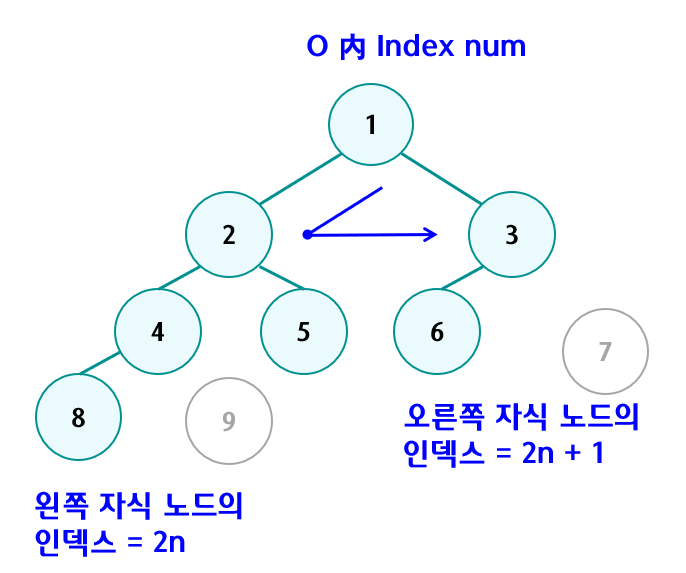

In [3]:
class Heap(ABC):
  @abstractmethod
  def swap(self):
    """완전 이진트리의 노드의 두 인덱스 간 위치를 교환히는 추상 메서드"""
    pass

  @abstractmethod
  def heapify(self):
    """
    heapify
    -------
    주어진 이진트리나 배열(리스트)를 마지막 노드에서 루트 노드로 가면서 힙 구조로 재배열하는 메서드
    모든 리프노드가 아닌 노드에 대하여 레벨의 역순으로 해당 노드와 자식노드 중 작은 값(최소 힙)을 가지는 노드를
    힙속성을 만족할 때까지 계속해서 교환하는 추상 메서드"""
    pass

In [4]:
class TreeHeapSort(Heap):
  """파이썬의 heapq.heapify 내장모듈의 함수를 구현하는 힙의 구체 클래스
  이진 트리(binary tree) 기반의 최소 힙(min heap) 자료구조"""
  def __init__(self, tree):
    self.tree = tree
    self.tree_size = len(self.tree)

  def swap(self, index_1, index_2):
    current = self.tree[index_1]
      # 이진트리의 index_1 위치의 값을 현재 변수로 저장
    self.tree[index_1] = self.tree[index_2]
      # 이진트리의 index_1 위치의 값에서 index_2 위치의 값으로 대체
    self.tree[index_2] = current
  # 대안: tree[index_1], tree[index_2] = tree[index_2], tree[index_1]
    return self.tree

  def heapify(self, parent_index):
    left_child_index = 2*parent_index
    right_child_index = 2*parent_index+1
      # 왼쪽 자식 노드의 인덱스와 오른쪽 자식 노드의 인덱스를 계산
      # 대안: parent_index = (len(tree)-1 - 1) // 2
    largest_index = parent_index
      # 부모 노드의 값이 가장 크다고 설정

    if (0 < left_child_index < self.tree_size and
       self.tree[largest_index] < self.tree[left_child_index]):
          # 왼쪽 자식 노드의 값과 비교
      largest_index = left_child_index

    if (0 < right_child_index < self.tree_size and
        self.tree[largest_index] < self.tree[right_child_index]):
          # 오른쪽 자식 노드의 값과 비교
      largest_index = right_child_index

    if largest_index != parent_index:
          # 부모 노드의 값이 자식 노드의 값보다 작은 경우
        self.swap(parent_index, largest_index)
            # 부모 노드와 최댓값을 가진 자식 노드의 위치를 바꿔준다
        self.heapify(largest_index)
            # 자리가 바뀌어 자식 노드가 된 기존의 부모 노드를 대상으로 heapify 함수 호출

    return self.tree

  def heapSorting(self):
    """힙 정렬을 구현하는 메서드"""
    for index in range(self.tree_size-1, 0, -1):
      self.heapify(index)

    for index in range(self.tree_size-1, 0, -1):
      self.swap(1, index)
      self.heapify(index)

    return self.tree


In [5]:
data_to_sort = [None, 6, 1, 4, 7, 10, 3, 8, 5, 1, 5, 7, 4, 2, 1]

In [6]:
heapSortObject = TreeHeapSort(tree = data_to_sort)

In [7]:
heapSortObject.heapify(parent_index = 1)
  # ???
  # 왜 그대로인지 코드 리뷰 요청

[None, 6, 1, 4, 7, 10, 3, 8, 5, 1, 5, 7, 4, 2, 1]

In [8]:
heapSortObject.heapSorting()
  # !!!
  # 내림차순 정렬이며, 느슨한 정렬이라는 점에서 코드 리뷰 요청

[None, 10, 8, 7, 7, 4, 4, 6, 1, 5, 1, 3, 2, 1, 5]

---

### 4.우선순위 큐

* 최댓값과 최솟값을 빠르게 찾도록 만들어진 힙(부모 노드가 자식 노드보다 우선순위를 가지기만 하면 되는 이진 트리)을 통해 구현하는 우선순위 큐
* 완벽히 정렬되지 않은 상태를 가질 수 있다는 점에 유의하여야 함. 즉, 힙은 느슨한 정렬 상태를 지속적으로 유지함. 또한 힙 트리에서는 중복값을 허용함.


* Max Heap Property : 부모 노드는 자식 노드보다 크거나 같다.
* Min Heap Property : 부모 노드는 자식 노드보다 작거나 같다.

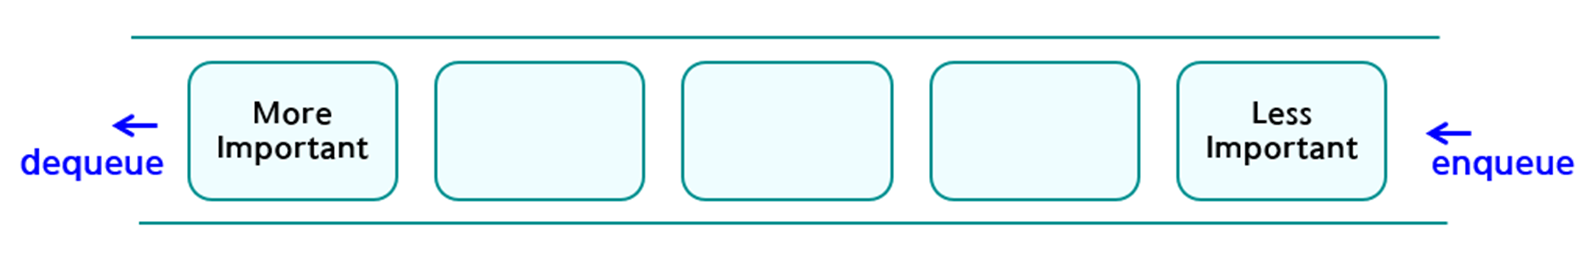

In [230]:
class MaxPriorityQueue(Heap):
  """우선순위가 가장 높은 데이터를 꺼내는 자료구조 우선순위 큐 구체 클래스"""
  def __init__(self):
    self.heap = [None]
      # 파이썬 리스트로 구현할 힙(complete binary tree-heap) 인스턴스 변수
      # 정렬된 동적 배열(array): 삽입 연산 O(n), 최우선순위 데이터 추출 연산 O(1)
      # 정렬된 더블리 연결 리스트(doubly linked list): 이하 상동

  def swap(self, tree, index_1, index_2):
    """완전 이전 트리 self.tree의 노드 index_1과 index_2의 위치를 교환하는 메서드"""
    current = tree[index_1]
    tree[index_1] = tree[index_2]
    tree[index_2] = current

  def heapify(self, tree, parent_index, tree_size):
    left_child_index = 2*parent_index
    right_child_index = 2*parent_index+1
      # 왼쪽 자식 노드의 인덱스와 오른쪽 자식 노드의 인덱스를 계산
      # 대안: parent_index = (len(tree)-1 - 1) // 2
    largest_index = parent_index
      # 부모 노드의 값이 가장 크다고 설정

    if (0 < left_child_index < tree_size and
       tree[largest_index] < tree[left_child_index]):
          # 왼쪽 자식 노드의 값과 비교
      largest_index = left_child_index

    if (0 < right_child_index < tree_size and
        tree[largest_index] < tree[right_child_index]):
          # 오른쪽 자식 노드의 값과 비교
      largest_index = right_child_index

    if largest_index != parent_index:
          # 부모 노드의 값이 자식 노드의 값보다 작은 경우
        self.swap(tree, parent_index, largest_index)
            # 부모 노드와 최댓값을 가진 자식 노드의 위치를 바꿔준다
        self.heapify(tree, largest_index)
            # 자리가 바뀌어 자식 노드가 된 기존의 부모 노드를 대상으로 heapify 함수 호출

  def reverse_heapify(self, tree, index):
    """삽입된 노드를 힙 속성을 지키는 위치로 이동시키는 reverse heapify 메서드"""
    parent_index = index // 2
      # 삽입된 노드의 부모 노드의 인덱스 번호를 생성
    if (0 < parent_index < len(tree) and
        tree[index] > tree[parent_index]):
      # 삽입된 노드의 부모 노드가 존재하면서 부모 노드의 값이 삽입된 자식 노드의 값보다 작을 경우
      self.swap(tree, parent_index, index)
        # 두 노드의 위치 교환(최대 힙 구현)
      self.reverse_heapify(tree, parent_index)
        # 삽입된 노드를 대상으로(파라미터로 넘겨서) 다시 heapify함수 재귀 호출

  def insert(self, data):
    """파이썬의 heapq.heappush() 내장모듈의 함수를 구현하는 삽입 메서드

    우선순위 큐
    -----------
    1. (동적 배열에) 데이터를 삽입할 때: 분할 상환 분석 시 O(1)
    2. 큐에 있는 데이터와 비교: O(1)
    3. 우선순위에 맞는 자리와 데이터 위치 교환: 힙의 높이만큼 매번 루트 노드와 리프 노드와 비교 O(log(n))

    SY's Trial & Error
    ------------------
    self.heap.append(data)
    for index in range(len(self.heap)):
      if (0 < index <= len(self.heap) and
          self.heap[self.heapify(index)] < self.heap[index]):
        # TypeError: '<' not supported between instances of 'NoneType' and 'int'
        self.swap(tree = self.heap,
                  index_1 = self.heapify(index),
                  index_2 = self.heap[index])
        max_value_index = self.heap[index]
      else:
         maxvalue_index = self.heapify(index)
    """
    self.heap.append(data)
    print(self.heap)
      # 힙의 마지막 인덱스 위치에 데이터 추가
    self.reverse_heapify(self.heap, len(self.heap)-1)
      # 힙의 마지막 요소의 인덱스를 넣어 self.heap에서 어떤 요소를 reverse heapify할지 결정
      # 즉, 삽입된 노드(추가된 데이터)의 위치를 힙 속성을 유지할 수 있도록 재배치

  def extractMax(self):
    """힙에서 최고 우선순위 데이터를 추출하는 메서드

    SY's Trial & Error
    ------------------
    root_node = self.heap[1]
    final_node = self.heap[-1]
    priority_value = []

    for last_index in range(len(self.heap), 0, -1):
        swap(self.heap, 1, last_index)
          # 1. 루트 노드와 마지막 노드의 위치 교환: O(1)
        final_node = priority_value.append(final_node)
        self.heap.pop()
          # 2. 마지막 위치로 간 루트 노드의 데이터를 새롭게 생성한 변수에 저장한 후 노드는 힙에서 삭제: 분할 상환 분석 시 O(1)
        heapify(self.heap, last_index)
          # 3. 새로운 루트 노드를 대상으로 heapify 수행하여 힙 속성 복원: O(log(n)
    return priority_value
      # 4. 별도로 저장해두었던 최우선순위 (기존 루트 노드) 데이터를 반환: O(1)
    """

    self.swap(self.heap, 1, len(self.heap)-1)
      # 루트 노드와 마지막 노드의 위치 교환
    priority_value = self.heap[len(self.heap)-1]
    self.heap.remove(priority_value)
      # 마지막 위치로 간 루트 노드의 데이터를 새롭게 생성한 변수에 저장한 후 노드는 힙에서 삭제
      # 대안: priority_value = self.heap.pop()

    for index in range(len(self.heap)-1, 0, -1):
      self.heapify(self.heap, 1, index+1)
        # 새로운 루트 노드를 대상으로 heapify 수행하여 힙 속성 복원
        # 대안: self.heapify(1, len(self.heap))
        # TypeError: object of type 'int' has no len()

    return priority_value
      # 별도로 저장해두었던 최우선순위 (기존 루트 노드) 데이터를 반환

  def __str__(self):
    return str(self.heap)

In [231]:
MaxHeapObject = MaxPriorityQueue()

In [232]:
MaxHeapObject.insert(6)
MaxHeapObject.insert(9)

[None, 6]
[None, 6, 9]


In [233]:
MaxHeapObject.insert(1)
MaxHeapObject.insert(3)

[None, 9, 6, 1]
[None, 9, 6, 1, 3]


In [234]:
MaxHeapObject.insert(10)
MaxHeapObject.insert(11)

[None, 9, 6, 1, 3, 10]
[None, 10, 9, 1, 3, 6, 11]


In [235]:
MaxHeapObject.insert(13)

[None, 11, 9, 10, 3, 6, 1, 13]


In [236]:
print(MaxHeapObject)
  # ???
  # [None, 13, 9, 11, 3, 6, 1, 10] 원하는 결과와 안 맞는 리턴값 -> 해결
  # !!!

[None, 13, 9, 11, 3, 6, 1, 10]


In [237]:
MaxHeapObject.extractMax()
  # TypeError: MaxPriorityQueue.extractMax() missing 1 required positional argument: 'self'

TypeError: ignored

In [238]:
help(MaxPriorityQueue)

Help on class MaxPriorityQueue in module __main__:

class MaxPriorityQueue(Heap)
 |  우선순위가 가장 높은 데이터를 꺼내는 자료구조 우선순위 큐 구체 클래스
 |  
 |  Method resolution order:
 |      MaxPriorityQueue
 |      Heap
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  extractMax(self)
 |      힙에서 최고 우선순위 데이터를 추출하는 메서드
 |      
 |      SY's Trial & Error
 |      ------------------
 |      root_node = self.heap[1]
 |      final_node = self.heap[-1]
 |      priority_value = []
 |          
 |      for last_index in range(len(self.heap), 0, -1):
 |          swap(self.heap, 1, last_index)
 |            # 1. 루트 노드와 마지막 노드의 위치 교환
 |          final_node = priority_value.append(final_node)
 |          self.heap.pop()
 |            # 2. 마지막 위치로 간 루트 노드의 데이터를 새롭게 생성한 변수에 저장한 후 노드는 힙에서 삭제
 |          heapify(self.heap, last_index)
 |            # 3

In [118]:
class MinPriorityQueue(Heap):
  """최소 힙으로 구현하는 우선순위 큐 구체 클래스
  향후 https://smlee729.github.io/python/data%20structure/2015/03/04/1-heap.html를 추가로 참고할 것"""
  def __init__(self):
    self.heap = []
      # MaxPriorityQueue 구체 클래스와 달리 0번째 인덱스를 None으로 선언하지 아니함

  def swap(self, tree, index_1, index_2):
    tree[index_1], tree[index_2] = tree[index_2], tree[index_1]

  def heapify(self):
    # 객체지향형 프로그램 설계 5대 원칙(SOLID) 중 다형성 원리(리스코프 치환 원칙, LSP)에 위배되는 부분
    # 즉, 최소 힙은 부모 클래스와 동일한 수준의 선행 조건을 기대하고 사용가능한 구체 클래스이지 아니함
    pass

  def checkParent(self, index):
    """새로운 값을 노드로 삽입하고 최소 힙을 구현하기 위한 부모 노드를 탐색하는 메서드

    탐색 메서드
    -----------
    MaxPriority.heapify() 메서드와 달리 부모 노드 탐색하는 절차를 분리하여 별도로 기능하도록 함"""
    if index == 0:
      return False
    else:
      parent_index = (index-1) // 2
        # 0번째부터 시작하는 힙의 요소를 반영하여 부모 노드의 인덱스 위치 생성
      if self.heap[parent_index] > self.heap[index]:
        return True
      return False

  def checkChild(self, index):
    """삭제하고 최소 힙을 구현하기 위한 자식 노드를 탐색하는 메서드"""
    left_child_index = 2*(index+1)-1
    right_child_index = 2*(index+1)
    last_index = len(self.heap)-1

    if (left_child_index <= last_index and
        right_child_index > last_index):
      # 왼쪽 자식 노드만 존재하는 경우(전체 힙의 높이보다 더 큰 인덱스를 가진 오른쪽 자식 노드는 없다고 봄)
      if self.heap[left_child_index] <= self.heap[index]:
          # 부모 노드보다 왼쪽 자식 노드의 값이 작을 경우
        return (True, 1)
      else:
        # 부모 노드보다 왼쪽 자식 노드의 값이 클 경우
        return (False, -1)

    elif (left_child_index > last_index and
          right_child_index <= last_index):
      # 오른쪽 자식 노드만 존재하는 경우
      if self.heap[right_child_index] <= self.heap[index]:
        # 부모 노드보다 오른쪽 자식 노드의 값이 작을 경우
        return (True, 2)
      else:
        # 부모 노드보다 오른쪽 자식 노드의 값이 클 경우
        return (False, -1)

    elif (left_child_index <= last_index and
          right_child_index <= last_index):
      # 왼쪽, 오른쪽 자식 노드가 모두 존재하는 경우
      if (self.heap[left_child_index] > self.heap[index] and
          self.heap[right_child_index] > self.heap[index]):
        # 부모 노드보다 왼쪽, 오른쪽 자식 노드의 값이 더 클 경우
        return (False, -1)
      else:
        # 부모 노드보다 왼쪽, 오른쪽 자식 노드 중 적어도 하나 이상의 값이 작을 경우
        if self.heap[left_child_index] <= self.heap[index]:
          # 왼쪽 값 < 부모 값 < 오른쪽 값
          return (True, 3)
        else:
          # 오른쪽 값 < 부모 값 < 왼쪽 값
          return (True, 4)

    return (False, -1)


  def insert(self, data):
    """파이썬의 heapq.heappush() 내장모듈의 함수를 구현하는 삽입 메서드"""
    self.heap.append(data)
      # 힙의 마지막 인덱스 위치에 데이터 추가
    index = len(self.heap)-1
      # 0번째부터 시작하는 힙의 요소를 반영하여 높이 생성
    while self.checkParent(index):
      # while self.checkParent(index) == True:
      parent = (index-1) // 2
      self.swap(tree = self.heap,
                index_1 = index,
                index_2 = parent)
      index = (index-1) // 2

  def pop(self):
    """파이썬의 heapq.heappop() 내장모듈의 함수를 구현하는 추출 메서드"""
    if not self.heap:
      # 힙에 원소가 없다면 아무것도 출력하지 아니함
      return None
    else:
      result = self.heap[0]
      self.heap[0] = self.heap[-1]
        # 맨 앞 요소를 맨 마지막 요소로 대체
      self.heap.pop()
        # 맨 마지막 요소를 추출(삭제)
      index = 0
        # index 초기화

      while self.checkChild(index)[0]:
        # checkChild 메서드가 "(False, -1)" 등 tuple형태로 반환된다는 점을 이용
        tuple = self.checkChild(index)[1]
        if tuple == 1 or tuple == 3:
          # 왼쪽 자식 노드의 값 < 부모 값이거나 왼쪽 값 < 부모 값 < 오른쪽 값 조건을 충족할 경우
          left_child_index = 2*(index+1)-1
          self.swap(tree = self.heap,
                    index_1 = index,
                    index_2 = left_child_index)
        elif tuple == 2 or tuple == 4:
          # 오른쪽 자식 노드의 값 < 부모 값이거나 오른쪽 값 < 부모 값 < 왼쪽 값 조건을 충족할 경우
          right_child_index = 2*(index+1)
          self.swap(tree = self.heap,
                    index_1 = index,
                    index_2 = right_child_index)
          index = 2*(index+1)

      return result


In [119]:
MinHeapObject = MinPriorityQueue()

In [120]:
MinHeapObject.insert(6)
MinHeapObject.insert(9)
MinHeapObject.insert(1)
MinHeapObject.insert(3)
MinHeapObject.insert(10)
MinHeapObject.insert(11)
MinHeapObject.insert(13)

In [121]:
print(MinHeapObject.heap)
print(MinHeapObject.pop())
print(MinHeapObject.pop())
print(MinHeapObject.heap)

[1, 3, 6, 9, 10, 11, 13]
1
3
[6, 13, 11, 9, 10]


---

### 5.이진 탐색 트리

* Dictionary, Set 추상 자료형을 구현하는데 쓰이는 자료구조

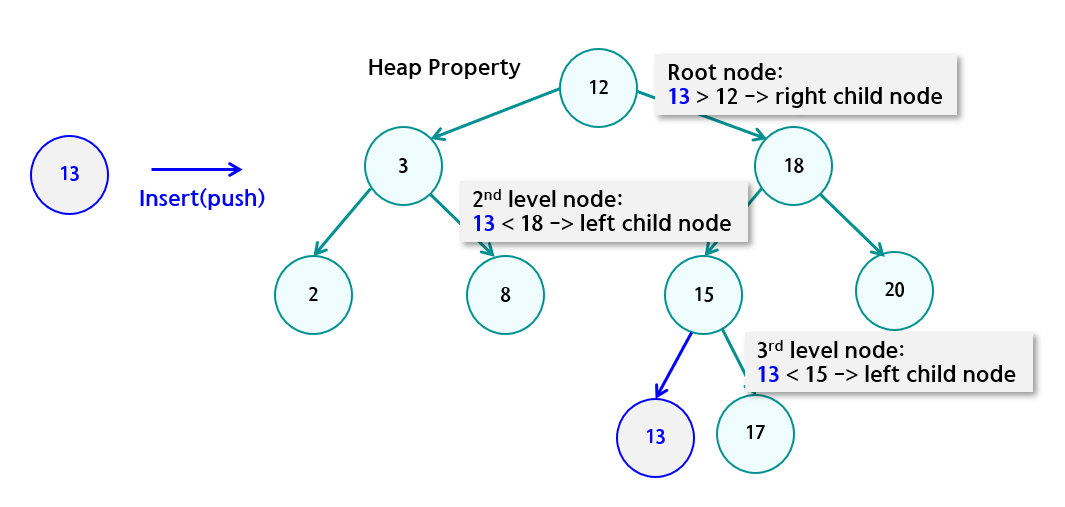

In [242]:
class Node:
    """이진 탐색 트리 노드 클래스"""
    def __init__(self, data):
        self.data = data
        self.parent = None
        self.left_child = None
        self.right_child = None

# Node Instance 생성
node_0 = Node(5)
node_1 = Node(3)
node_2 = Node(7)

node_0.left_child = node_1
node_0.right_child = node_2
node_1.parent = node_0
node_2.parent = node_0

In [ ]:
def print_inorder(node):
    """주어진 노드를 전위 순회(inorder traversal)로 출력해주는 함수"""
    if node is not None:
        print_inorder(node.left_child)
        print(node.data)
        print_inorder(node.right_child)

In [ ]:
class BinarySearchTree:
    """이진 탐색 트리 클래스"""
    def __init__(self):
        self.root = None


    def insert(self, data):
        """이진 탐색 트리에 데이터를 삽입하는 메서드

        SY's Trial & Error 1
        --------------------
        elif self.root < new_node:
            self.root.right_child = new_node
        else:
        # elif self.root > new_node:
            self.root.left_child = new_node

        SY's Trial & Error 2
        --------------------
        while True:
            if (new_node.data < self.root.data and
                self.root.left_child != None):
                    self.root = self.root.left_child

            elif (new_node.data < self.root.data and
                  self.root.left_child == None):
                self.root.left_child = new_node
                break

            elif (new_node.data > self.root.data and
                  self.root.right_child != None):
                self.root = self.root.right_child

            elif (new_node.data > self.root.data and
                  self.root.right_child == None):
                self.root.right_child = new_node
                break
        """
        new_node = Node(data)
          # 삽입할 데이터를 갖는 새 노드 생성
        if self.root is None:
          # 트리가 비었으면 새로운 노드를 root 노드로 만든다
            self.root = new_node
            return

        parent_node = self.root
         # 일단 루트 노드를 부모 노드로 설정

        while new_node.parent is None:
           # 새로운 노드의 부모가 없을 때 까지 계속 탐색
            if new_node.data < parent_node.data:
                if parent_node.left_child is None:
                   # 부모 노드의 왼쪽 자식이 비어 있으면 추가
                    new_node.parent = parent_node
                    parent_node.left_child = new_node
                else:
                   # 부모 노드의 왼쪽 자식이 있으면 왼쪽 자식을 새로운 부모로 설정 후 계속 탐색
                    parent_node = parent_node.left_child

            else:
                if parent_node.right_child is None:
                   # 부모 노드의 오른쪽 자식이 비어 있으면 추가
                    new_node.parent = parent_node
                    parent_node.right_child = new_node
                else:
                  # 부모 노드의 오른쪽 자식이 있으면 오른쪽 자식을 새로운 부모로 설정 후 계속 탐색
                    parent_node = parent_node.right_child

    def print_sorted_tree(self):
        """이진 탐색 트리 내의 데이터를 정렬된 순서로 출력해주는 메서드"""
        print_inorder(self.root)
          # root 노드를 in-order로 출력한다

In [243]:
# 빈 이진 탐색 트리 생성
bst = BinarySearchTree()

In [244]:
# 데이터 삽입
bst.insert(7)
bst.insert(11)
bst.insert(9)
bst.insert(17)
bst.insert(8)
bst.insert(5)
bst.insert(19)
bst.insert(3)
bst.insert(2)
bst.insert(4)
bst.insert(14)

In [245]:
# 이진 탐색 트리 출력
bst.print_sorted_tree()

2
3
4
5
7
8
9
11
14
17
19
